## Import required modules

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Preparing the data

In [65]:
#load data from text file
data = pd.read_csv('ex1data1.txt',names=['Population', 'Profit'])

In [66]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Plotting the dataset to see how it actually looks

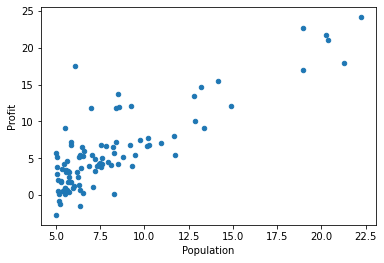

In [67]:
data.plot(kind='scatter', x='Population', y='Profit')

### Cost Function

In [68]:
data = np.array(data)
#seperate the input (X) and output (Y)
X = data[:,:1]
Y = data[:,1:]

In [69]:
# introduce weights of hypothesis (randomly initialize)
Theta = np.random.rand(1,2)
# m is total example set , n is number of features
m,n = X.shape
# add bias to input matrix by simple make X0 = 1 for all
X1 = np.ones((m,2))
X1[:,1:] = X
# output first 5 X_bias examples
X1[0:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [70]:
Theta

array([[0.5587021 , 0.16982484]])

In [71]:
#define function to find cost
def costfunction(X1,Y,Theta):
    hypothesis = X1.dot(Theta.transpose())
    return (1/(2.0*len(X1)))*((np.square(hypothesis-Y)).sum(axis=0))

In [72]:
X1.shape, Theta.shape, Y.shape

((97, 2), (1, 2), (97, 1))

### Cost of the model before training it

In [74]:
costfunction(X1,Y,Theta)

array([19.82008768])

In [95]:
#function gradient descent algorithm from minimizing theta
def gradientDescent(X_bias,Y,Theta,iterations,alpha):
    count = 1
    cost_log = np.array([])
    while(count <= iterations):
        hypothesis = X_bias.dot(Theta.transpose())
        temp0 = Theta[0,0] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,0:1])).sum(axis=0)
        temp1 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,-1:])).sum(axis=0)
        Theta[0,0] = temp0
        Theta[0,1] = temp1
        cost_log = np.append(cost_log,costfunction(X1,Y,Theta))
        count = count + 1
    plt.plot(np.linspace(1,iterations,iterations,endpoint=True),cost_log)
    plt.title("Cost w.r.t iterations ")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost function")
    plt.show()
    theta=Theta
    return Theta

In [96]:
theta

matrix([[0.89816297, 0.37671217]])

### Cost at optimal value

In [97]:
costfunction(X1, Y, Theta)

array([4.47697138])

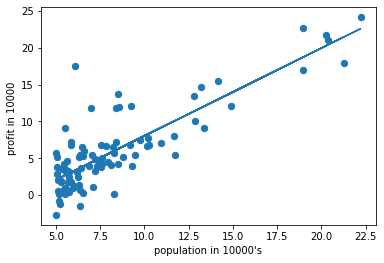

In [100]:
# Plot showing hypothesis 
plt.scatter(X.transpose(),Y.transpose(),40,)
X_axis = X
Y_axis = X1.dot(Theta.transpose())
plt.plot(X_axis,Y_axis)
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 ")
plt.show()

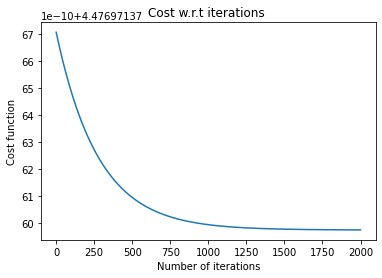

In [99]:
alpha = 0.01
iterations = 2000 #the value of iterations is 1500 enough. 2000 uses for demonstration
Theta = gradientDescent(X1,Y,Theta,iterations,alpha)

### Predictions

In [105]:
X_test = np.array([[1,5.5],[1,3.5]])
hypothesis = X_test.dot(Theta.transpose())
print('profit from 55000 people city is ',hypothesis[0,0]*10000)
print('profit from 35000 people city is ',hypothesis[1,0]*10000)

profit from 55000 people city is  26659.052526403393
profit from 35000 people city is  2798.384527562021
